# **Лабораторна робота 6: Пошук аномалій та вирішення задачі *anomaly detection* за допомогою бібліотек `scikit-learn`та `PyTorch`**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

### Мета роботи:
Ознайомитися з основними методами виявлення аномалій, навчитися використовувати бібліотеки `scikit-learn` та `PyTorch` для реалізації алгоритмів пошуку аномалій, проаналізувати ефективність різних методів на реальних наборах даних з Kaggle.


### Опис завдання:

1. **Постановка задачі**:
   Використовуючи один із доступних наборів даних Kaggle (наприклад, *Credit Card Fraud Detection*, *Network Intrusion*, або інші), вам потрібно розв'язати задачу виявлення аномалій. Основна мета — ідентифікувати аномальні записи серед нормальних. Вибраний набір даних повинен містити мітки аномалій для перевірки результатів.

2. **Етапи виконання завдання**:
   - Завантажте та підготуйте набір даних.
   - Проведіть попередню обробку даних (масштабування, заповнення пропущених значень, видалення нерелевантних ознак).
   - Використайте різні методи виявлення аномалій:
     - **Методи з бібліотеки scikit-learn**:
       - Isolation Forest
       - One-Class SVM
       - Local Outlier Factor (LOF)
     - **Методи з використанням PyTorch**:
       - Автоенкодери для виявлення аномалій.
   - Порівняйте отримані результати, обчисліть метрики якості (Precision, Recall, F1-Score).
   - Оцініть, який метод найкраще підходить для вирішення задачі на вашому наборі даних.

### Покрокова інструкція

1. **Підготовка середовища**:
   - Встановіть необхідні бібліотеки:
     ```
     pip install scikit-learn torch pandas numpy matplotlib
     ```

2. **Вибір набору даних з Kaggle**:
   Зареєструйтесь на Kaggle та оберіть один із наборів даних для виявлення аномалій. Наприклад:
   - [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
   - [Network Intrusion Detection](https://www.kaggle.com/xyuanh/benchmarking-datasets)

3. **Попередня обробка даних**:
   - Завантажте дані та проведіть їхню початкову обробку.
   - Масштабуйте ознаки за допомогою `StandardScaler` або `MinMaxScaler`.
   - Розділіть дані на навчальну і тестову вибірки.

4. **Методи з бібліотеки `scikit-learn`**:

   - **Isolation Forest**:
     ```
     from sklearn.ensemble import IsolationForest
     ```

   - **One-Class SVM**:
     ```
     from sklearn.svm import OneClassSVM
     ```

   - **Local Outlier Factor**:
     ```
     from sklearn.neighbors import LocalOutlierFactor
     ```

5. **Методи на основі нейронних мереж (PyTorch)**:

   Використайте автоенкодер для пошуку аномалій. Побудуйте нейронну мережу з енкодером і декодером. Під час навчання порівняйте відновлені дані з вхідними та обчисліть помилку. Записи з великою помилкою можуть бути аномаліями.

   - **Реалізація автоенкодера**:
     ```
     import torch
     import torch.nn as nn
     import torch.optim as optim
     ```

6. **Оцінка результатів**:
   Використовуйте метрики оцінки якості:
   - `Precision`, `Recall`, `F1-score`
   ```
   from sklearn.metrics import classification_report
   ```

7. **Звіт**:
   - Поясніть, який метод дав найкращі результати.
   - Проаналізуйте, чому деякі методи працюють краще на вашому наборі даних.
   - Оцініть можливості використання глибоких нейронних мереж (автоенкодерів) для вирішення задачі.


### Результати, які необхідно надати:
1. Код рішення у вигляді Jupyter Notebook з аналізом результатів та поясненнями.


### Дедлайн:
[27 жовтня 23:59]


### Корисні ресурси:
- [Документація PyTorch](https://pytorch.org/docs/stable/index.html)
- [Документація scikit-learn](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Datasets](https://www.kaggle.com/datasets)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim



palette = ['#00777F', '#5BABF5', '#AADEFE', '#EAAC9F', '#8AA0AF']
sns.set_theme(context='notebook', palette=palette, style='darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
credit_card_data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:


credit_card_data.isnull().sum()



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

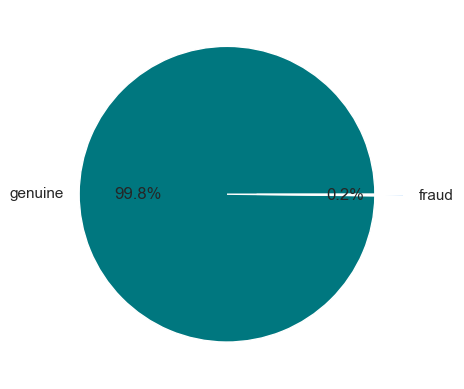

In [6]:
vc = credit_card_data['Class'].value_counts(ascending=False)

plt.pie(x=vc.values, labels=['genuine','fraud'], explode=[0.0, 0.2], autopct='%1.1f%%')
plt.show()

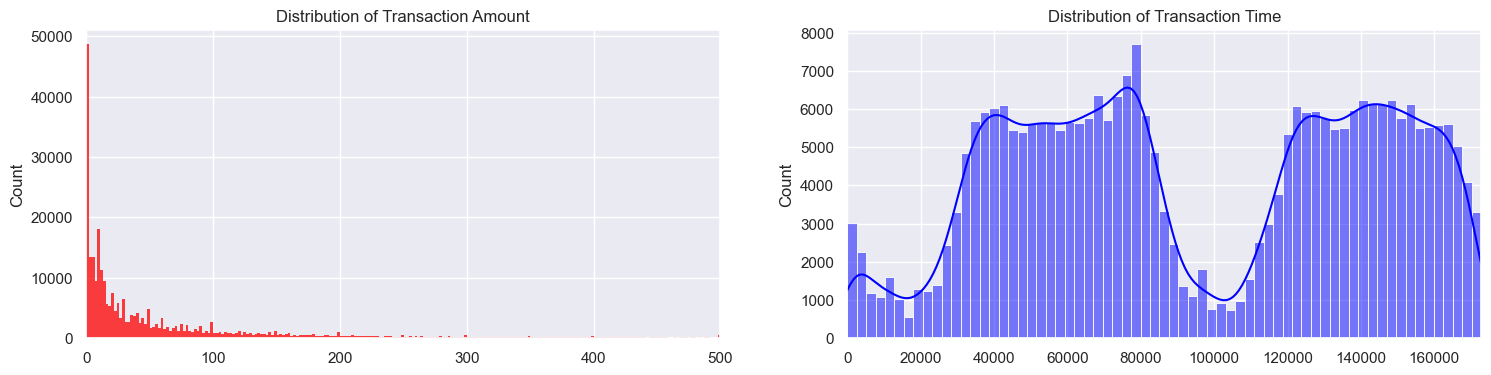

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = credit_card_data['Amount'].values
time_val = credit_card_data['Time'].values


sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim(0, 500)  

sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [8]:
credit_card_data.duplicated().sum()

np.int64(1081)

In [9]:
X = credit_card_data.drop(columns=['Class'])
y = credit_card_data['Class']



In [10]:
X = credit_card_data.drop(columns=["Time", "Amount", "Class"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [11]:
def report(y_true, preds, model_name):

    print("Classification Report for", model_name)
    print(classification_report(y_true, preds))


    conf_matrix = confusion_matrix(y_true, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {model_name} Predictions")
    plt.show()


    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X_test)

    colors = ['green' if label == 0 else 'red' for label in preds]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, alpha=0.6)
    
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Normal'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraud')]
    plt.legend(handles=handles, title="Legend")


    plt.title(f"{model_name} Predictions")
    plt.show()

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Isolation Forest

In [13]:

isolation_forest = IsolationForest(contamination=0.05, random_state=101, n_jobs=-1)   

isolation_forest.fit(X_train)


isolation_forest_preds_test = isolation_forest.predict(X_test)

isolation_forest_preds_test = [1 if x == -1 else 0 for x in isolation_forest_preds_test]

# print(isolation_forest_preds_test)





Classification Report for Isolation Forest
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.86      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962



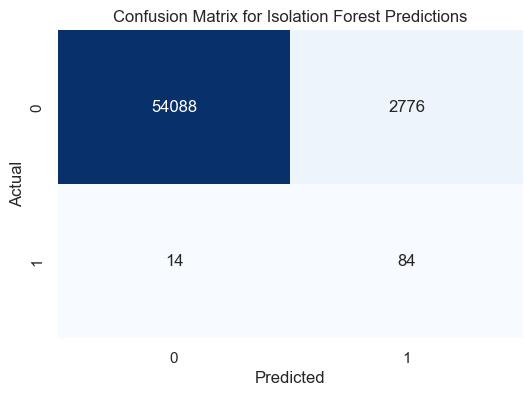

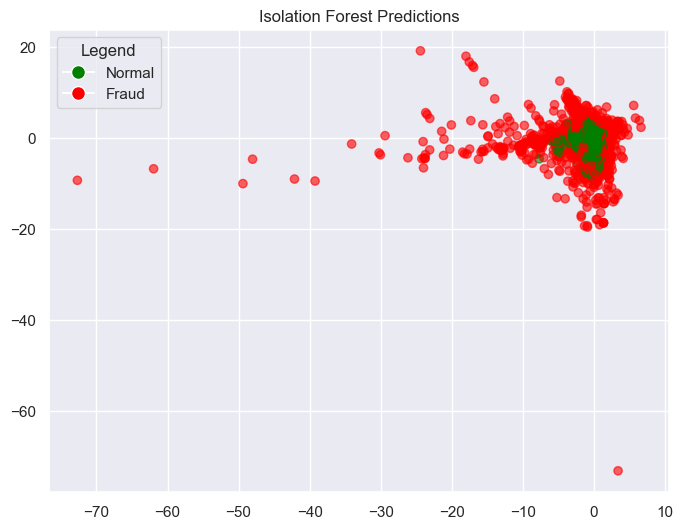

In [14]:
report(y_test, isolation_forest_preds_test, "Isolation Forest")


## One Class SVM

Classification Report for One Class SVM
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



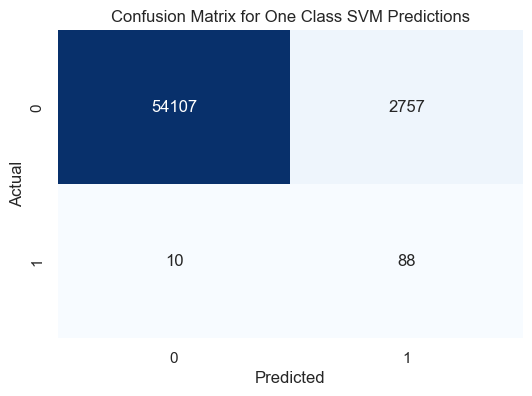

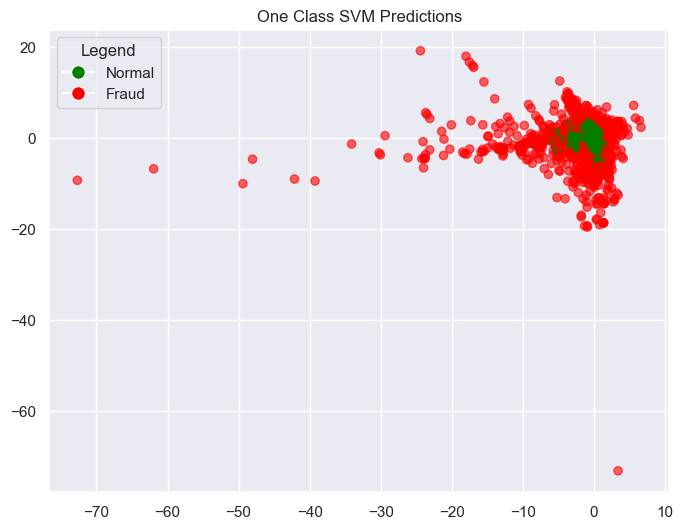

In [15]:
one_class_svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)

svm_preds_train = one_class_svm.fit(X_train)

svm_preds_test = one_class_svm.predict(X_test)


svm_preds_test = [1 if x == -1 else 0 for x in svm_preds_test]

report(y_test, svm_preds_test, "One Class SVM")



## Local Outlier Factor

Classification Report for Local Outlier Factor
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.01      0.17      0.01        98

    accuracy                           0.95     56962
   macro avg       0.50      0.56      0.49     56962
weighted avg       1.00      0.95      0.97     56962



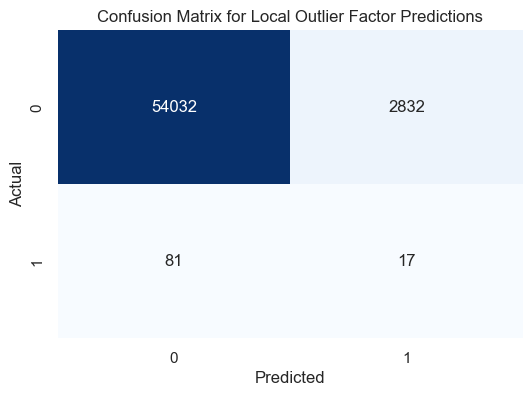

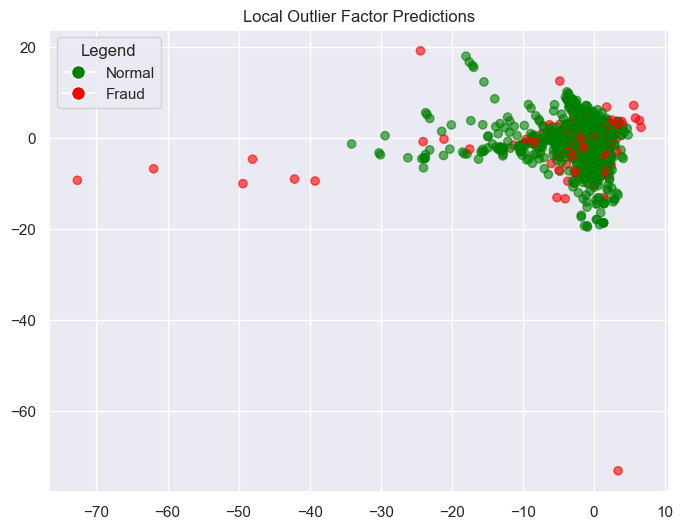

In [16]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, n_jobs=-1)

lof_preds_train = lof.fit_predict(X_train)

lof_preds_test = lof.fit_predict(X_test)  

lof_preds_test = [1 if x == -1 else 0 for x in lof_preds_test]

report(y_test, lof_preds_test, "Local Outlier Factor")

## Autoencoder

In [17]:
hyper_params = {
    "learning_rate": 0.001,
    "epochs": 20,
    "batch_size": 64,
    "weight_decay": 1e-8,
}

In [18]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

In [19]:
batch_size = hyper_params['batch_size']

train_dataset = torch.utils.data.TensorDataset(X_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [20]:
class Autoencoder(nn.Module):
    def __init__(self, input_dimmention):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dimmention, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 7),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dimmention),
            nn.Sigmoid() 
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [21]:
model = Autoencoder(input_dimmention=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=hyper_params["learning_rate"], 
                             weight_decay=hyper_params['weight_decay'])

In [22]:
num_epochs = 25
loss_history = []
for epoch in range(num_epochs):
    total_loss = 0
    for data in train_loader:
        inputs = data[0]
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    
    avg_loss = total_loss / len(train_loader)
    loss_history.append(avg_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

with torch.no_grad():
    reconstructed = model(X_test_tensor)
    reconstruction_error = ((reconstructed - X_test_tensor) ** 2).mean(dim=1).numpy()

threshold = np.percentile(reconstruction_error, 95)
print(threshold)
y_pred = (reconstruction_error > threshold).astype(int)

# print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

Epoch [1/25], Average Loss: 0.9224
Epoch [2/25], Average Loss: 0.8716
Epoch [3/25], Average Loss: 0.8567
Epoch [4/25], Average Loss: 0.8475
Epoch [5/25], Average Loss: 0.8421
Epoch [6/25], Average Loss: 0.8382
Epoch [7/25], Average Loss: 0.8325
Epoch [8/25], Average Loss: 0.8240
Epoch [9/25], Average Loss: 0.8198
Epoch [10/25], Average Loss: 0.8166
Epoch [11/25], Average Loss: 0.8122
Epoch [12/25], Average Loss: 0.8055
Epoch [13/25], Average Loss: 0.8017
Epoch [14/25], Average Loss: 0.7989
Epoch [15/25], Average Loss: 0.7959
Epoch [16/25], Average Loss: 0.7948
Epoch [17/25], Average Loss: 0.7932
Epoch [18/25], Average Loss: 0.7929
Epoch [19/25], Average Loss: 0.7914
Epoch [20/25], Average Loss: 0.7900
Epoch [21/25], Average Loss: 0.7862
Epoch [22/25], Average Loss: 0.7817
Epoch [23/25], Average Loss: 0.7778
Epoch [24/25], Average Loss: 0.7735
Epoch [25/25], Average Loss: 0.7727
1.5678649


Classification Report for Autoencoder
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



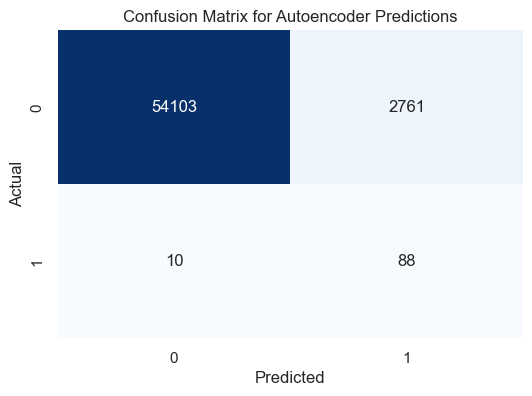

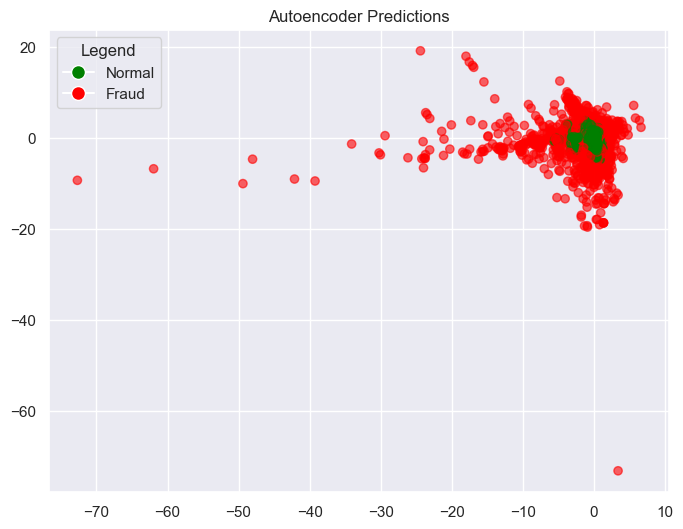

In [23]:
report(y_test, y_pred, "Autoencoder")


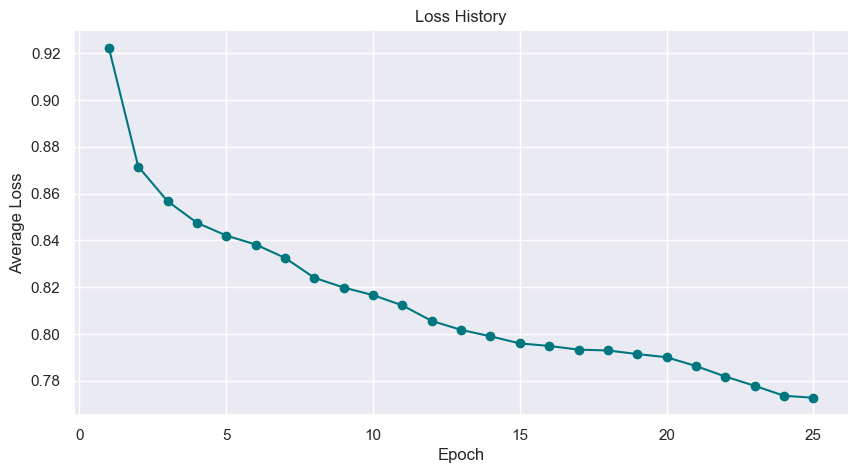

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid(True)
plt.show()

## Висновок

- Для виявлення аномалій у даних я використав Isolation Forest, One-Class SVM, Local Outlier Factor і глибинну нейронну мережу автоенкодер. Для оцінки ефективності я використав Confusion Matrix і метрики з Classification Report.
- Hайгіршим методом для цієї задачі є Local Outlier Factor. (recall 0.17). Це найгірший результат серед 4 методів. Навіть якщо подивитися на скаттерплот то видно наскільки мало він виявив аномалій. Причина цього він виявляє аномалії на основі локальних відхилень у щільності даних і цей підхід не ефективний на нерівномірних даних.


- One-Class SVM та Автоенкодер досягли найвищого показника recall для класу аномалій (0.90) і це означає що вони ефективно виявляють аномальні транзакції.
- Precision для аномалій залишається низьким у всіх методах через дуже високу дисбалансованість даних.
- Найкращі тут One-Class SVM та Автоенкодер бо вони спеціально призначені для таких задач а саме через те що вони моделюють нормальний клас і виявляють аномалії як відхилення від цього моделювання.